In [2]:
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values

In [43]:
df = pd.read_csv("Melbourne01.txt", header=None, delim_whitespace=True, )
df.columns = ['Year', 'Month', 'Day', 'Hour', 'Miniute', 'DBT', 'DPT', 'Apparent Temp', 'Relative Humidity(%)', 'Wind_direction', 'Average wind-speed (km/h)', 'Wind-gust(km/h)', 'MSL_Pressure', 'Rainfall(mm)']

In [44]:
df_clean = df.drop_duplicates()
df_clean2 = df.drop_duplicates()
df_clean2

,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965313,2021,3,16,16,0,19.9,17.9,12.7,63.0,S,20.0,30.0,1024.1,0.0
965314,2021,3,16,16,30,19.9,18.0,13.1,65.0,S,20.0,28.0,1023.7,0.0
965315,2021,3,16,17,0,20.5,19.1,13.5,64.0,S,19.0,28.0,1023.5,0.0
965316,2021,3,16,17,30,19.9,18.1,13.4,66.0,S,20.0,30.0,1023.3,0.0


In [45]:
df_clean = df_clean.reset_index()
df_clean2 = df_clean2.reset_index()
df_clean

,index,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
0,0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
1,2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
2,4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
3,6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
4,9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473502,965313,2021,3,16,16,0,19.9,17.9,12.7,63.0,S,20.0,30.0,1024.1,0.0
473503,965314,2021,3,16,16,30,19.9,18.0,13.1,65.0,S,20.0,28.0,1023.7,0.0
473504,965315,2021,3,16,17,0,20.5,19.1,13.5,64.0,S,19.0,28.0,1023.5,0.0
473505,965316,2021,3,16,17,30,19.9,18.1,13.4,66.0,S,20.0,30.0,1023.3,0.0


In [46]:
df_clean.sort_values(by=['Average wind-speed (km/h)'])

,index,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
472859,964665,2021,3,3,11,0,16.1,12.8,6.5,53.0,-,-9999.0,-9999.0,1020.8,0.0
119797,237564,2013,8,28,5,45,11.6,9.8,9.4,86.0,N,0.0,0.0,1018.9,0.0
199537,396531,2015,5,16,5,10,11.6,11.0,7.3,75.0,CALM,0.0,0.0,1036.0,0.0
326423,675221,2018,1,24,6,50,16.3,17.7,14.3,88.0,CALM,0.0,0.0,1011.1,0.0
326424,675223,2018,1,24,7,0,16.9,17.3,13.8,82.0,CALM,0.0,0.0,1010.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265305,554685,2016,10,9,12,30,18.1,11.1,6.9,48.0,N,85.0,98.0,1004.8,0.0
303500,629573,2017,7,29,10,39,14.5,5.5,2.4,44.0,N,85.0,96.0,1011.9,0.0
408776,838445,2019,10,26,12,50,13.5,7.8,2.7,48.0,WSW,87.0,104.0,1006.7,0.0
303501,629575,2017,7,29,10,49,14.6,5.9,2.2,43.0,N,89.0,100.0,1011.5,0.0


In [47]:
df_clean.sort_values(by=['DPT'])


,index,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
78903,156681,2012,9,29,1,15,8.1,-4.1,2.9,70.0,W,43.0,52.0,1001.5,8.0
158219,313995,2014,6,24,12,15,11.8,-4.1,6.8,71.0,WSW,80.0,93.0,994.8,3.4
207777,429267,2015,7,19,8,40,1.1,-3.4,-0.1,92.0,N,17.0,17.0,1034.4,0.0
354263,730379,2018,8,29,7,40,1.1,-3.1,-1.0,86.0,NNW,9.0,11.0,1023.5,0.0
207776,429263,2015,7,19,6,50,1.1,-3.0,0.1,93.0,N,19.0,20.0,1033.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373443,768496,2019,1,24,18,10,40.4,41.7,15.2,22.0,NNE,20.0,24.0,1006.5,0.0
137693,273028,2014,1,16,15,24,43.5,42.1,10.9,14.0,NNW,6.0,7.0,1010.7,0.0
421377,863310,2020,1,31,17,30,41.1,42.2,17.1,24.0,W,28.0,33.0,1001.6,0.4
421378,863312,2020,1,31,17,40,41.1,43.2,18.9,27.0,NW,37.0,44.0,1002.3,0.4


In [48]:
df.iloc[[964664, 964665, 964666]]


,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
964664,2021,3,3,10,50,15.9,11.8,6.1,52.0,N,0.0,0.0,1020.7,0.0
964665,2021,3,3,11,0,16.1,12.8,6.5,53.0,-,-9999.0,-9999.0,1020.8,0.0
964666,2021,3,3,11,30,16.0,13.5,6.7,54.0,S,24.0,28.0,1020.6,0.0


In [49]:
df_clean['Average wind-speed (km/h)']=df_clean['Average wind-speed (km/h)'].replace([-9999.0], 12)
df_clean['Wind-gust(km/h)']=df_clean['Wind-gust(km/h)'].replace([-9999.0], 14)

In [50]:
print(df_clean.loc[df_clean['Wind_direction'].str.contains('-')])

         index  Year  Month  Day  Hour  Miniute   DBT   DPT  Apparent Temp  \
472859  964665  2021      3    3    11        0  16.1  12.8            6.5   

        Relative Humidity(%) Wind_direction  Average wind-speed (km/h)  \
472859                  53.0              -                       12.0   

        Wind-gust(km/h)  MSL_Pressure  Rainfall(mm)  
472859             14.0        1020.8           0.0  


In [51]:
df_clean['Wind_direction']=df_clean['Wind_direction'].replace(['-'], 'S')

In [52]:
print(df_clean.loc[df_clean['Wind_direction'].str.contains('-')])

Empty DataFrame
Columns: [index, Year, Month, Day, Hour, Miniute, DBT, DPT, Apparent Temp, Relative Humidity(%), Wind_direction, Average wind-speed (km/h), Wind-gust(km/h), MSL_Pressure, Rainfall(mm)]
Index: []


In [53]:
df_clean.loc[df_clean['Wind_direction'] == 'CALM']

,index,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
53960,107418,2012,3,11,5,44,13.5,11.8,8.3,71.0,CALM,0.0,0.0,1018.3,0.0
70574,140227,2012,7,23,18,4,13.5,12.6,6.1,61.0,CALM,0.0,0.0,1027.1,0.0
178040,353609,2014,11,28,3,15,12.2,10.5,8.3,77.0,CALM,0.0,0.0,1022.1,0.0
178041,353611,2014,11,28,3,25,12.2,10.5,8.3,77.0,CALM,0.0,0.0,1022.0,0.0
178050,353629,2014,11,28,4,55,12.4,10.4,8.8,79.0,CALM,0.0,0.0,1022.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473288,965099,2021,3,12,8,0,16.5,17.6,16.5,100.0,CALM,0.0,0.0,1016.9,0.0
473289,965100,2021,3,12,8,30,16.8,18.4,16.8,100.0,CALM,0.0,7.0,1017.0,0.0
473290,965101,2021,3,12,9,0,17.9,18.9,16.9,94.0,CALM,0.0,0.0,1016.7,0.0
473291,965102,2021,3,12,9,30,18.4,18.5,16.4,88.0,CALM,0.0,0.0,1016.6,0.0


In [54]:
df_clean

,index,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
0,0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
1,2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
2,4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
3,6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
4,9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473502,965313,2021,3,16,16,0,19.9,17.9,12.7,63.0,S,20.0,30.0,1024.1,0.0
473503,965314,2021,3,16,16,30,19.9,18.0,13.1,65.0,S,20.0,28.0,1023.7,0.0
473504,965315,2021,3,16,17,0,20.5,19.1,13.5,64.0,S,19.0,28.0,1023.5,0.0
473505,965316,2021,3,16,17,30,19.9,18.1,13.4,66.0,S,20.0,30.0,1023.3,0.0


In [55]:
df.iloc[[155562, 492093, 656665, 523434]]

,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
155562,2012,9,24,13,44,14.8,6.8,0.5,37.0,1016.6,0.0,0.0,0.0,0.0
492093,2016,2,8,6,40,19.3,19.1,15.8,80.0,1021.0,0.0,0.0,0.0,0.0
656665,2017,11,12,12,30,21.5,21.7,14.6,65.0,1022.0,0.0,0.0,0.0,0.0
523434,2016,6,9,15,20,16.8,14.4,8.8,59.0,1004.5,0.0,0.0,0.0,0.0


In [56]:
df_clean.isna()

,index,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
473503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
473504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
473505,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
df_clean.iloc[473506:473549]

,index,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
473506,965317,2021,3,16,18,0,19.9,18.6,13.6,67.0,S,17.0,24.0,1023.3,0.0


In [58]:
df_clean2.loc[~df_clean2['Wind_direction'].isin(['N', 'NE', 'NNE', 'ENE', 'E', 'ESE', 'SSE', 'SE', 'S', 'SW', 'W', 'SSW', 'WSW', 'WNW', 
                                                'NNW', 'NW', 'CALM'])]

,index,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
78332,155561,2012,9,24,13,44,14.8,6.8,0.5,37.0,1016.6,0.0,0.0,0.0,0.0
78333,155563,2012,9,24,13,54,13.8,6.4,2.1,45.0,1016.9,0.0,0.0,0.0,0.0
78334,155564,2012,9,24,14,14,13.4,6.8,4.2,53.0,1017.0,0.0,0.0,0.0,0.0
78335,155565,2012,9,24,14,34,14.3,7.0,2.3,44.0,1017.0,0.0,0.0,0.0,0.0
78336,155566,2012,9,24,15,4,13.4,5.9,1.2,43.0,1017.4,0.0,0.0,0.0,0.0
102969,204303,2013,4,19,11,45,16.3,9.0,0.1,33.0,1026.0,0.0,0.0,0.0,0.0
104387,207108,2013,4,30,10,35,15.7,14.2,6.9,56.0,1026.1,0.0,0.0,0.0,0.0
108111,214459,2013,5,29,11,5,15.9,11.2,6.2,52.0,1025.3,0.0,0.0,0.0,0.0
111690,221549,2013,6,26,10,25,9.2,6.7,3.9,69.0,1024.2,0.0,0.0,0.0,0.0
113755,225625,2013,7,12,10,25,11.5,8.1,6.1,69.0,1029.6,0.0,0.0,0.0,0.0


In [59]:
df_wsw=df_clean.loc[df_clean['Wind_direction'].isin(['WSW'])]
df_wsw.loc[df_wsw['MSL_Pressure'] < 990]

,index,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)


In [60]:
anom_index = list(df_clean.query("MSL_Pressure < 900").index)


for i in anom_index:
    df_clean.loc[i, "MSL_Pressure"] = float(df_clean.loc[i, "Wind_direction"])
    
    df_clean.loc[i, "Wind_direction"] = 'CALM'
    
    
    
print(anom_index)

[78332, 78333, 78334, 78335, 78336, 102969, 104387, 108111, 111690, 113755, 114789, 116997, 136415, 179970, 188605, 233664, 233669, 233691, 233712, 233714, 233729, 233732, 233736, 233753, 233762, 233773, 233802, 233804, 233817, 233819, 233823, 233829, 233831, 233833, 233843, 233863, 233865, 233877, 233901, 233912, 233914, 233921, 233924, 233932, 233955, 233961, 233967, 233972, 233974, 233977, 233984, 249659, 317060, 317544, 317554, 321945]


In [61]:
df_clean = df_clean.drop('index', axis = 1)

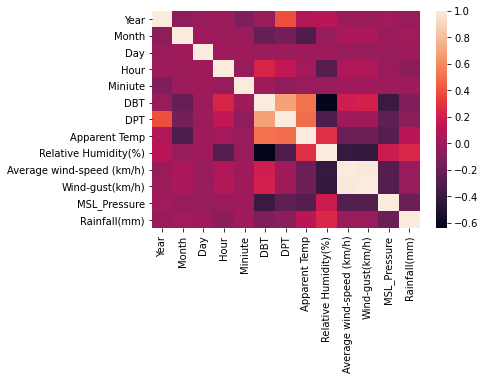

In [62]:
corr = sns.heatmap(df_clean.corr())

In [63]:
df_clean

,Year,Month,Day,Hour,Miniute,DBT,DPT,Apparent Temp,Relative Humidity(%),Wind_direction,Average wind-speed (km/h),Wind-gust(km/h),MSL_Pressure,Rainfall(mm)
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
1,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
2,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
3,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
4,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473502,2021,3,16,16,0,19.9,17.9,12.7,63.0,S,20.0,30.0,1024.1,0.0
473503,2021,3,16,16,30,19.9,18.0,13.1,65.0,S,20.0,28.0,1023.7,0.0
473504,2021,3,16,17,0,20.5,19.1,13.5,64.0,S,19.0,28.0,1023.5,0.0
473505,2021,3,16,17,30,19.9,18.1,13.4,66.0,S,20.0,30.0,1023.3,0.0


In [80]:
Average=df_clean.groupby(['Year', 'Month', 'Day']).mean()
MAX=df_clean.groupby(['Year', 'Month', 'Day']).max()
MIN=df_clean.groupby(['Year', 'Month', 'Day']).min()

In [81]:
MAX

Hour  Miniute   DBT   DPT  Apparent Temp  \
Year Month Day                                             
2011 1     1      23       54  24.9   0.0           14.9   
           2      23       54  21.4   0.0           11.4   
           3      23       54  20.3   0.0            7.1   
           4      23       54  21.5   0.0           12.4   
           5      23       54  21.3   0.0           13.2   
...              ...      ...   ...   ...            ...   
2021 3     12     23       37  29.8  29.2           17.1   
           13     23       43  27.1  27.6           17.3   
           14     23       30  17.4  14.1            9.3   
           15     23       30  21.5  20.6           14.5   
           16     18       30  20.5  19.1           14.4   

                Relative Humidity(%) Wind_direction  \
Year Month Day                                        
2011 1     1                    80.0            WSW   
           2                    71.0            SSW   
           3                    57.0            SSW   
           4                    85.0            WSW   
           5                    79.0            WSW   
...                              ...            ...   
2021 3     12                  100.0            WNW   
           13                   96.0            WSW   
           14                   81.0            WSW   
           15                   89.0            WSW   
           16                   91.0             SW   

                Average wind-speed (km/h)  Wind-gust(km/h)  MSL_Pressure  \
Year Month Day                                                             
2011 1     1                         37.0             43.0        1015.2   
           2                         33.0             39.0        1017.6   
           3                         35.0             41.0        1018.5   
           4                         30.0             37.0        1016.3   
           5                         32.0             37.0        1012.4   
...                                   ...              ...           ...   
2021 3     12                        24.0             33.0        1018.0   
           13                        46.0             59.0        1017.6   
           14                        30.0             41.0        1023.9   
           15                        22.0             28.0        1025.3   
           16                        22.0             30.0        1026.9   

                Rainfall(mm)  
Year Month Day                
2011 1     1             0.0  
           2             0.0  
           3             0.0  
           4             0.0  
           5             0.0  
...                      ...  
2021 3     12            0.0  
           13           15.8  
           14           17.2  
           15            0.0  
           16            0.0  

[3728 rows x 11 columns]

In [73]:
Date = pd.to_datetime(df_clean[['Year', 'Month', 'Day']])

In [71]:
Date

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
473502   2021-03-16
473503   2021-03-16
473504   2021-03-16
473505   2021-03-16
473506   2021-03-16
Length: 473507, dtype: datetime64[ns]

In [4]:
df3 = pd.read_csv("Melbourne Daily Max Data.csv" )

In [5]:
df3

,Timestamp,Dry_bulb_temp,Dew_point_temp,Apparent_temp,Relative_humidity,Wind_direction,Average_wind_speed,Max_wind_speed,Mean_sea_level_pressure,Rainfall
0,2011-01-01,24.9,0.0,14.9,80.0,WSW,37.0,43.0,1015.2,0.0
1,2011-01-02,21.4,0.0,11.4,71.0,SSW,33.0,39.0,1017.6,0.0
2,2011-01-03,20.3,0.0,7.1,57.0,SSW,35.0,41.0,1018.5,0.0
3,2011-01-04,21.5,0.0,12.4,85.0,WSW,30.0,37.0,1016.3,0.0
4,2011-01-05,21.3,0.0,13.2,79.0,WSW,32.0,37.0,1012.4,0.0
...,...,...,...,...,...,...,...,...,...,...
3723,2021-03-12,29.8,29.2,17.1,100.0,WNW,24.0,33.0,1018.0,0.0
3724,2021-03-13,27.1,27.6,17.3,96.0,WSW,46.0,59.0,1017.6,15.8
3725,2021-03-14,17.4,14.1,9.3,81.0,WSW,30.0,41.0,1023.9,17.2
3726,2021-03-15,21.5,20.6,14.5,89.0,WSW,22.0,28.0,1025.3,0.0
